# Business Problem

    Develop the Model that helps in predicting the customer churn.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load The Data
df=pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# DATA UNDERSTANDING

**The details about all the columns:**

      RowNumber: Unique Row Number
      CustomerId: Unique Customer Id
      Surname: Surname of a customer
      CreditScore: Credit Score of each Customer
      Geography: Geographical Location of Customers
      Gender: Sex of Customers
      Age: Age of Each Customer
      Tenure: Number of years
      Balance: Current Balance of Customers
      NumOfproducts: Number of Products
      HasCrCard: If a customer has a credit card or not
      IsActiveMemeber: If a customer is active or not
      EstimatedSalary: Estimated Salary of each Customer
      Exited: Customer left the bank or Not (Target Variable)



---




# DATASET UNDERSTANDING

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Checking for any null values.
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Checking for duplicate records.
df.duplicated().sum()

0

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# Dropping Irreleent Columns.
df=df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EXPLORATORY DATA ANALYSIS

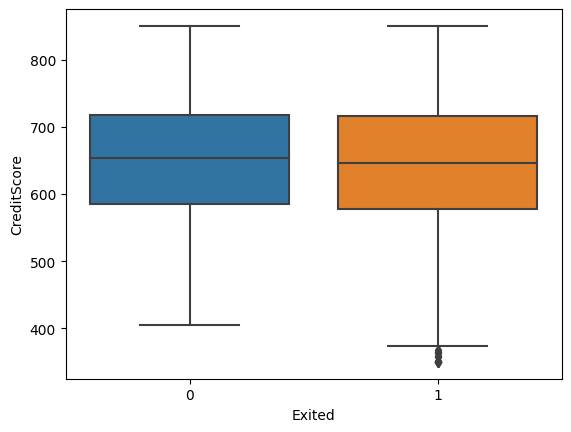

In [ ]:
sns.boxplot(x=df['Exited'], y=df['CreditScore'])
plt.show()

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
print('% of customer exited for France:',(df[df['Geography']=='France']['Exited']==1).sum()/df['Geography'].value_counts()[0])
print('% of customer exited for Germany:',(df[df['Geography']=='Germany']['Exited']==1).sum()/df['Geography'].value_counts()[1])
print('% of customer exited for Spain:',(df[df['Geography']=='Spain']['Exited']==1).sum()/df['Geography'].value_counts()[2])


% of customer exited for France: 0.16154766653370561
% of customer exited for Germany: 0.32443204463929853
% of customer exited for Spain: 0.1667339523617279


In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
print((df[df['Gender']=='Male']['Exited']==1).sum()/df['Gender'].value_counts()[0])
print((df[df['Gender']=='Female']['Exited']==1).sum()/df['Gender'].value_counts()[1])

0.16455928165658787
0.2507153863086066


<Axes: xlabel='Age', ylabel='Count'>

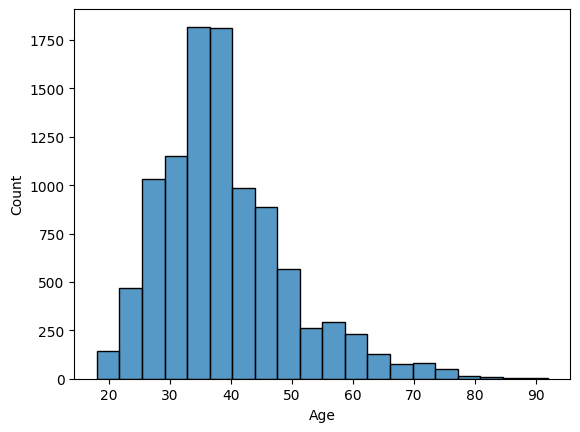

In [ ]:
sns.histplot(df['Age'], bins=20)

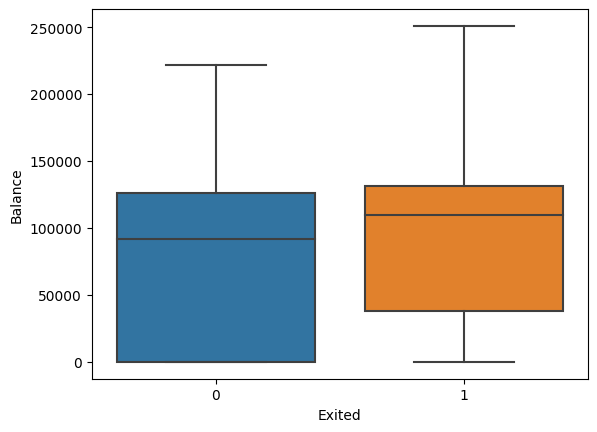

In [ ]:
sns.boxplot(x=df['Exited'], y=df['Balance'])
plt.show()

<Axes: >

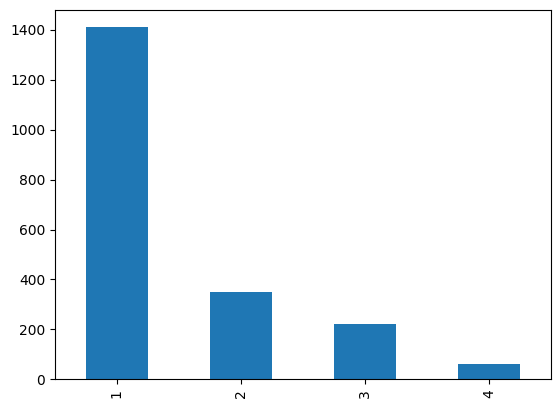

In [ ]:
df[df['Exited']==1]['NumOfProducts'].value_counts().plot(kind='bar')

<Axes: >

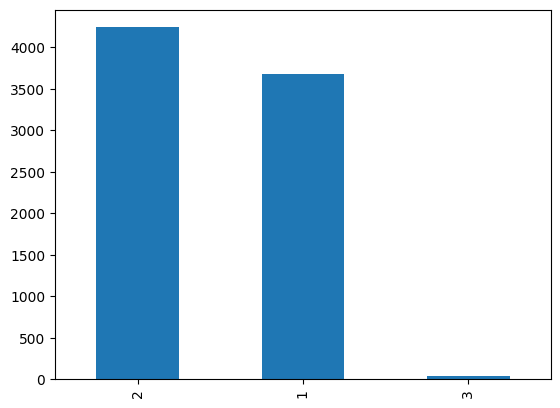

In [ ]:
df[df['Exited']==0]['NumOfProducts'].value_counts().plot(kind='bar')

In [ ]:
print(df[df['Exited']==1]['HasCrCard'].value_counts())
print(df[df['Exited']==0]['HasCrCard'].value_counts())

1    1424
0     613
Name: HasCrCard, dtype: int64
1    5631
0    2332
Name: HasCrCard, dtype: int64


In [ ]:
print('The % of Customers who did not exit holding Credi_card:', df[df['Exited']==0]['HasCrCard'].value_counts()[1]/len(df[df['Exited']==0])*100)

The % of Customers who did not exit holding Credi_card: 70.7145548160241


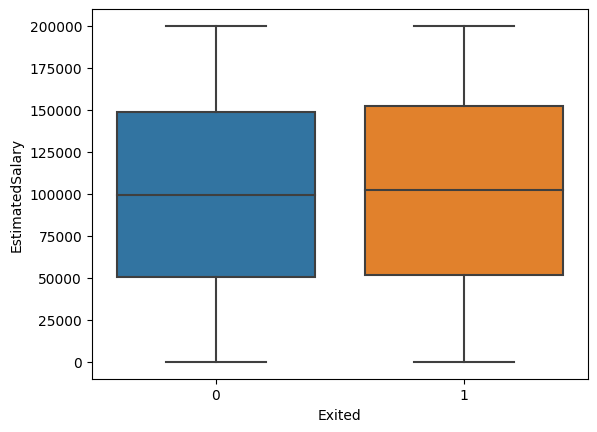

In [ ]:
sns.boxplot(x=df['Exited'], y=df['EstimatedSalary'])
plt.show()

In [ ]:
print(df[df['Exited']==1]['IsActiveMember'].value_counts())
print(df[df['Exited']==0]['IsActiveMember'].value_counts())

0    1302
1     735
Name: IsActiveMember, dtype: int64
1    4416
0    3547
Name: IsActiveMember, dtype: int64


In [ ]:
print('The % of Customers who exited were not Active_Members:',df[df['Exited']==1]['IsActiveMember'].value_counts()[0]/len(df[df['Exited']==1])*100)

The % of Customers who exited were not Active_Members: 63.91752577319587


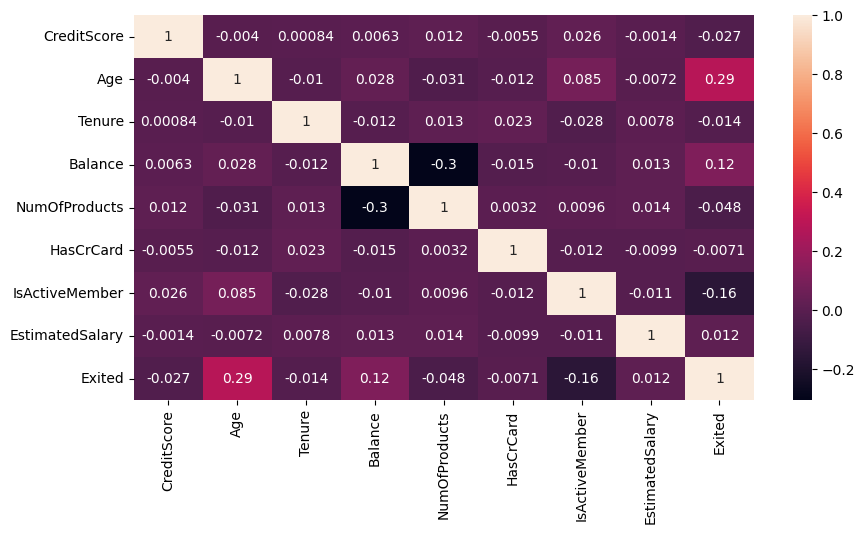

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

 **Encoding Categorical data**


In [ ]:
df=pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


**Target Variable**

In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: >

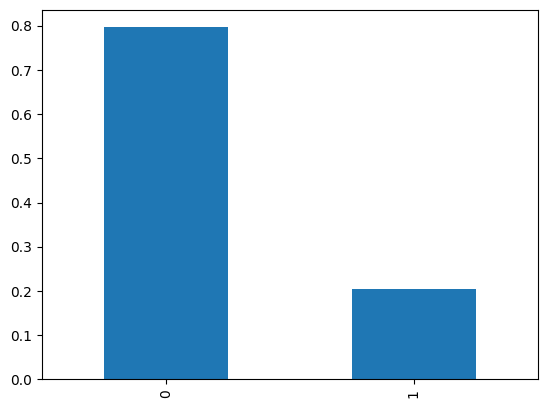

In [ ]:
df['Exited'].value_counts(normalize='True').plot(kind='bar')

The Target Variable is imbalance, will use **SMOTE** technique to balance the minority class.

In [ ]:
x=df.drop('Exited', axis=1)
y=df['Exited']

**Handling Imbalanced Data with SMOTE**

In [ ]:
! pip install imblearn


In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_new, y_new= smote.fit_resample(x, y)

1    7963
0    7963
Name: Exited, dtype: int64


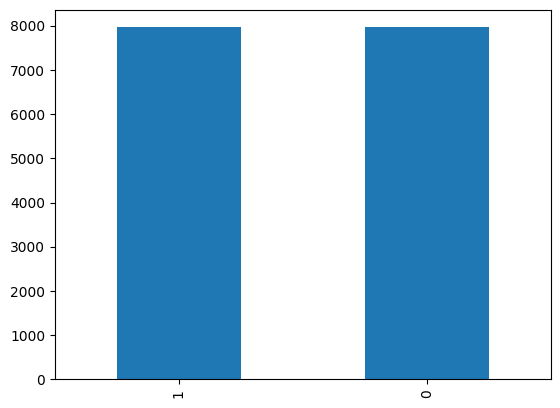

In [ ]:
print(y_new.value_counts())
y_new.value_counts().plot(kind='bar')
plt.show()

**Splitting The Dataset into Training Set and Test Set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x_new, y_new, test_size=0.2, random_state=47)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# MODELLING

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
lc=LogisticRegression()
lc.fit(X_train, y_train)

train_pred=lc.predict(X_train)
test_pred=lc.predict(X_test)

print('Train accuracy:', accuracy_score(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))

print('CV:', cross_val_score(lc, x_new, y_new, cv=5).mean())

print(confusion_matrix(y_test, test_pred))

print(classification_report(y_test, test_pred))

Train accuracy: 0.7841444270015698
Test accuracy: 0.7677338355304457
CV: 0.6736792541150894
[[1234  393]
 [ 347 1212]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1627
           1       0.76      0.78      0.77      1559

    accuracy                           0.77      3186
   macro avg       0.77      0.77      0.77      3186
weighted avg       0.77      0.77      0.77      3186



**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

train_pred=knn.predict(X_train)
test_pred=knn.predict(X_test)

print('Train accuracy:', accuracy_score(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))

print('CV:', cross_val_score(knn, x_new, y_new, cv=5).mean())

print(confusion_matrix(y_test, test_pred))

print(classification_report(y_test, test_pred))

Train accuracy: 0.8760596546310832
Test accuracy: 0.8010043942247332
CV: 0.6950903925238066
[[1265  362]
 [ 272 1287]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1627
           1       0.78      0.83      0.80      1559

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186



In [ ]:
# Hyperparameter Tuning of KNN
from sklearn.model_selection import GridSearchCV
estimator=KNeighborsClassifier()
param_grid={'n_neighbors': list(range(1,21)), 'p': [1,2]}
knnn=GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
knnn.fit(X_train, y_train)
knnn.best_params_

{'n_neighbors': 7, 'p': 1}

In [ ]:
# Final KNN Model with best Parameters.
knn_new=KNeighborsClassifier(n_neighbors=12, p=1)
knn_new.fit(X_train, y_train)

train_pred=knn.predict(X_train)
test_pred=knn.predict(X_test)

print('Train accuracy:', accuracy_score(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))

print('CV:', cross_val_score(knn_new, x_new, y_new, cv=5).mean())

print(confusion_matrix(y_test, test_pred))

print(classification_report(y_test, test_pred))

Train accuracy: 0.8760596546310832
Test accuracy: 0.8010043942247332
CV: 0.6711058289750783
[[1265  362]
 [ 272 1287]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1627
           1       0.78      0.83      0.80      1559

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186



**DECSION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

train_pred=dt.predict(X_train)
test_pred=dt.predict(X_test)

print('Train accuracy:', accuracy_score(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))

print('CV:', cross_val_score(dt, x_new, y_new, cv=5).mean())

print(confusion_matrix(y_test, test_pred))

print(classification_report(y_test, test_pred))

Train accuracy: 1.0
Test accuracy: 0.7890772128060264
CV: 0.7899697361198571
[[1257  370]
 [ 302 1257]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1627
           1       0.77      0.81      0.79      1559

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186



In [ ]:
# Feature Importances.
Fea_imp=pd.DataFrame(list(dt.feature_importances_), index=x.columns, columns=['Importance'])
Fea_imp.sort_values(by='Importance', ascending=False)

,Importance
Age,0.250350
EstimatedSalary,0.132987
Balance,0.126000
IsActiveMember,0.122519
CreditScore,0.115046
NumOfProducts,0.090942
Tenure,0.065610
Gender_Male,0.045531
Geography_Spain,0.020363
HasCrCard,0.016079


In [ ]:
# Hyperparameter Tuning of Decision Tree
from sklearn.model_selection import GridSearchCV
estimator=DecisionTreeClassifier()
param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1,2,3,4,5,6,7,8,9]}
dtt=GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
dtt.fit(X_train, y_train)
dtt.best_params_

{'criterion': 'gini', 'max_depth': 8}

In [ ]:
# Final Decision Tree Model with best Parameters.
dt_new=DecisionTreeClassifier(criterion='gini', max_depth=8)
dt_new.fit(X_train, y_train)

train_pred=dt_new.predict(X_train)
test_pred=dt_new.predict(X_test)

print('Train accuracy:', accuracy_score(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))

print('CV:', cross_val_score(dt_new, x_new, y_new, cv=5).mean())

print(confusion_matrix(y_test, test_pred))

print(classification_report(y_test, test_pred))

Train accuracy: 0.8453689167974883
Test accuracy: 0.7934714375392341
CV: 0.7981340460275085
[[1275  352]
 [ 306 1253]]


**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

train_pred=rf.predict(X_train)
test_pred=rf.predict(X_test)

print('Train accuracy:', accuracy_score(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))

print('CV:', cross_val_score(rf, x_new, y_new, cv=5).mean())

print(confusion_matrix(y_test, test_pred))

print(classification_report(y_test, test_pred))

Train accuracy: 1.0
Test accuracy: 0.8502824858757062
CV: 0.8515060690363354
[[1370  257]
 [ 220 1339]]


In [ ]:
# Hyperparameter Tuning of Random Forest
from sklearn.model_selection import GridSearchCV
estimator=RandomForestClassifier(random_state=0)
param_grid={'n_estimators': list(range(1,101))}
rff=GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
rff.fit(X_train, y_train)
rff.best_params_

{'n_estimators': 74}

In [ ]:
# Final Random Forest Model with best Parameters.
rf_new=RandomForestClassifier(n_estimators=74, random_state=0)
rf_new.fit(X_train, y_train)

train_pred=rf_new.predict(X_train)
test_pred=rf_new.predict(X_test)

print('Train accuracy:', accuracy_score(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))

print('CV:', cross_val_score(rf_new, x_new, y_new, cv=5).mean())

print(confusion_matrix(y_test, test_pred))

print(classification_report(y_test, test_pred))

Train accuracy: 0.9999215070643642
Test accuracy: 0.8509102322661645
CV: 0.8511923140978832
[[1374  253]
 [ 222 1337]]


**ADA BOOST**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train, y_train)

train_pred=ada.predict(X_train)
test_pred=ada.predict(X_test)

print('Train accuracy:', accuracy_score(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))

print('CV:', cross_val_score(ada, x_new, y_new, cv=5).mean())

print(confusion_matrix(y_test, test_pred))

print(classification_report(y_test, test_pred))

Train accuracy: 0.8211930926216641
Test accuracy: 0.8069679849340866
CV: 0.8113195189708508
[[1295  332]
 [ 283 1276]]


In [ ]:
# Hyperparameter Tuning of ADA BOOST
from sklearn.model_selection import GridSearchCV
estimator=AdaBoostClassifier()
param_grid={'n_estimators': list(range(1,51))}
adaa=GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
adaa.fit(X_train, y_train)
adaa.best_params_

{'n_estimators': 44}

In [ ]:
# Final ADA Boost Model with best Parameters.
ada_new=AdaBoostClassifier(n_estimators=44)
ada_new.fit(X_train, y_train)

train_pred=ada_new.predict(X_train)
test_pred=ada_new.predict(X_test)

print('Train accuracy:', accuracy_score(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))

print('CV:', cross_val_score(ada_new, x_new, y_new, cv=5).mean())

print(confusion_matrix(y_test, test_pred))

print(classification_report(y_test, test_pred))

Train accuracy: 0.8208006279434851
Test accuracy: 0.805398618957941
CV: 0.8111310767969364
[[1293  334]
 [ 286 1273]]


**GRADIENT BOOST**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train, y_train)

train_pred=gb.predict(X_train)
test_pred=gb.predict(X_test)

print('Train accuracy:', accuracy_score(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))

print('CV:', cross_val_score(gb, x_new, y_new, cv=5).mean())

print(confusion_matrix(y_test, test_pred))

print(classification_report(y_test, test_pred))

Train accuracy: 0.8452119309262166
Test accuracy: 0.8242310106716887
CV: 0.8287126468724532
[[1340  287]
 [ 273 1286]]


In [ ]:
# Hyperparameter Tuning of Gradient Boost
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingClassifier()
param_grid={'n_estimators': list(range(51,101)), 'learning_rate':[0.1, 0.2, 0.3, 0.5, 0.6, 0.8, 1]}
gba=GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
gba.fit(X_train, y_train)
gba.best_params_

{'learning_rate': 0.5, 'n_estimators': 54}

In [ ]:
# Final Gradient Boost Model with best Parameters.
gb_new=GradientBoostingClassifier(n_estimators=54,learning_rate=0.5)
gb_new.fit(X_train, y_train)

train_pred=gb_new.predict(X_train)
test_pred=gb_new.predict(X_test)

print('Train accuracy:', accuracy_score(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))

print('CV:', cross_val_score(gb_new, x_new, y_new, cv=5).mean())

print(confusion_matrix(y_test, test_pred))

print(classification_report(y_test, test_pred))

Train accuracy: 0.8641287284144427
Test accuracy: 0.82015065913371
CV: 0.834112645492791
[[1334  293]
 [ 280 1279]]


**XGBOOST**

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(X_train, y_train)

train_pred=xg.predict(X_train)
test_pred=xg.predict(X_test)

print('Train accuracy:', accuracy_score(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))

print('CV:', cross_val_score(xg, x_new, y_new, cv=5).mean())

print(confusion_matrix(y_test, test_pred))

print(classification_report(y_test, test_pred))

Train accuracy: 0.9408163265306122
Test accuracy: 0.8449466415568111
CV: 0.8508782635174887
[[1365  262]
 [ 232 1327]]


In [ ]:
# Hyperparameter Tuning of XGB Classifier.
from sklearn.model_selection import GridSearchCV
estimator=XGBClassifier()
param_grid={'n_estimators': list(range(1,51)), 'max_depth':[3,4,5], 'gamma':[0.1, 0.4, 0.6, 0.8, 1]}
xgg=GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
xgg.fit(X_train, y_train)
xgg.best_params_

{'gamma': 0.1, 'max_depth': 5, 'n_estimators': 48}

In [ ]:
# Final XGB Classifier Model with best Parameters.
xg_new=XGBClassifier(n_estimators=48, max_depth=5, gamma=0.1)
xg_new.fit(X_train, y_train)

train_pred=xg_new.predict(X_train)
test_pred=xg_new.predict(X_test)

print('Train accuracy:', accuracy_score(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))

print('CV:', cross_val_score(xg_new, x_new, y_new, cv=5).mean())

print(confusion_matrix(y_test, test_pred))

print(classification_report(y_test, test_pred))

Train accuracy: 0.8819466248037676
Test accuracy: 0.8370998116760828
CV: 0.8417106631150215
[[1354  273]
 [ 246 1313]]


**Will Finalize the XGB classifier as good to go Model. It has given high accuracy score among all other models.**